<a href="https://colab.research.google.com/github/tjdudgml3/ms_aischool/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw,ImageFont
from io import BytesIO
import json

face regconition program by Azure

In [ ]:
subscription_key= ''
face_api_url = 'https://labuser71face.cognitiveservices.azure.com/face/v1.0/detect/'

In [ ]:
image_url = 'https://img.marieclairekorea.com/2022/08/mck_63045e8a69bc0.jpg'
image = Image.open(BytesIO(requests.get(image_url).content))

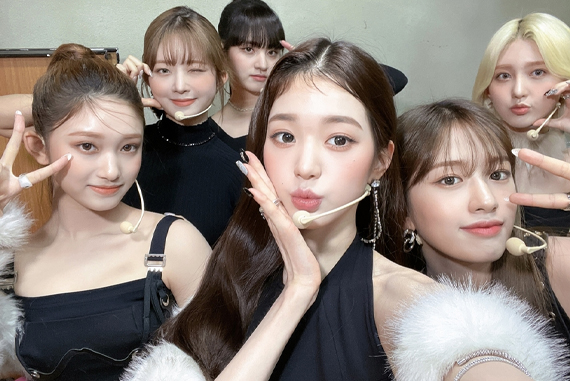

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}

In [ ]:
params = {
    # 'returnFaceID' : 'true',
    'returnFaceLandmarks' : 'false',
    'returnFaceAttributes' : 'Smile'
}

In [ ]:
data = {'url':image_url}

In [ ]:
response = requests.post(face_api_url,params = params, headers = headers,json = data)
faces = response.json()
faces

[{'faceRectangle': {'top': 108, 'left': 250, 'width': 118, 'height': 118},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 148, 'left': 426, 'width': 106, 'height': 106},
  'faceAttributes': {'smile': 0.433}},
 {'faceRectangle': {'top': 123, 'left': 63, 'width': 87, 'height': 87},
  'faceAttributes': {'smile': 0.763}},
 {'faceRectangle': {'top': 54, 'left': 484, 'width': 73, 'height': 73},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 52, 'left': 148, 'width': 65, 'height': 65},
  'faceAttributes': {'smile': 0.998}},
 {'faceRectangle': {'top': 35, 'left': 233, 'width': 55, 'height': 55},
  'faceAttributes': {'smile': 0.0}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(image):
  for face in image:
    rect = face['faceRectangle']
    x = rect['left']
    y = rect['top']
    w = rect['width']
    h = rect['height']

    draw.rectangle(((x,y),(x+w,y+h)),outline = 'red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((x,y),str(smile), fill = 'red')

In [ ]:
DrawBox(faces)


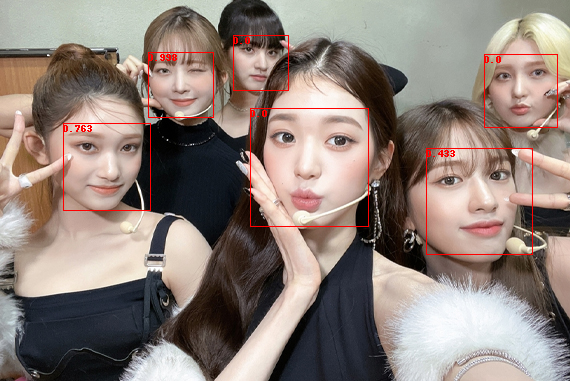

In [ ]:
image